In [1]:
#Environment Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [4]:
#Data Read
file_path = '../input/red-wine-quality-cortez-et-al-2009'
train=pd.read_csv(f'{file_path}/winequality-red.csv')

In [5]:
df=train.copy()

In [6]:
#Data Cleaning, Missing Value Handling,#Feature Engineering, #EDA Analysis

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
#EDA Analysis , # Data Visualization

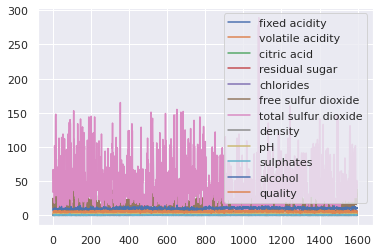

In [10]:
import seaborn; seaborn.set()
df.plot();

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


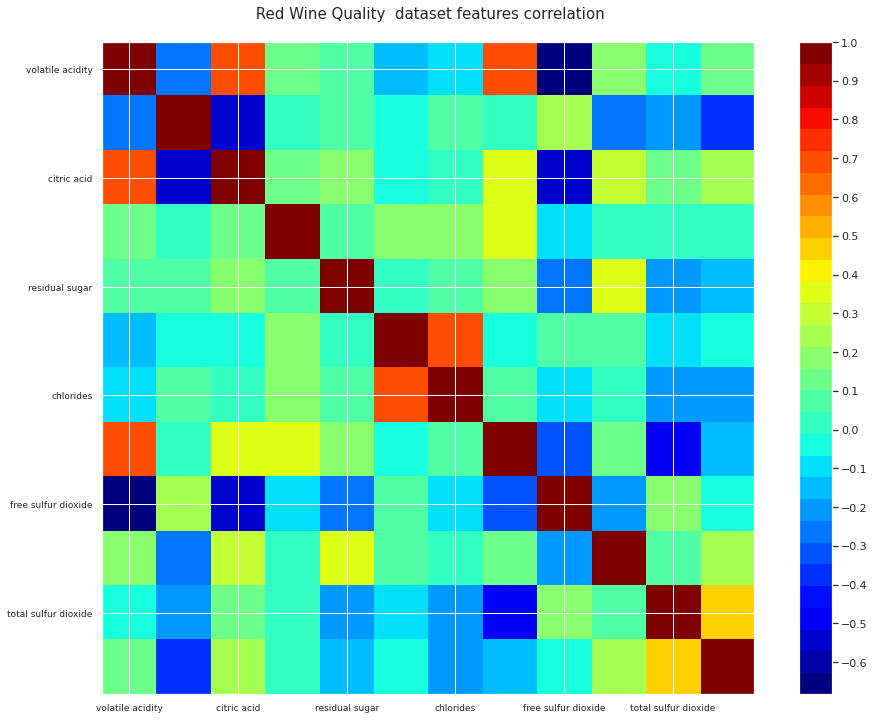

In [12]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(' Red Wine Quality  dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [13]:

from matplotlib import pyplot as plt
import seaborn as sns

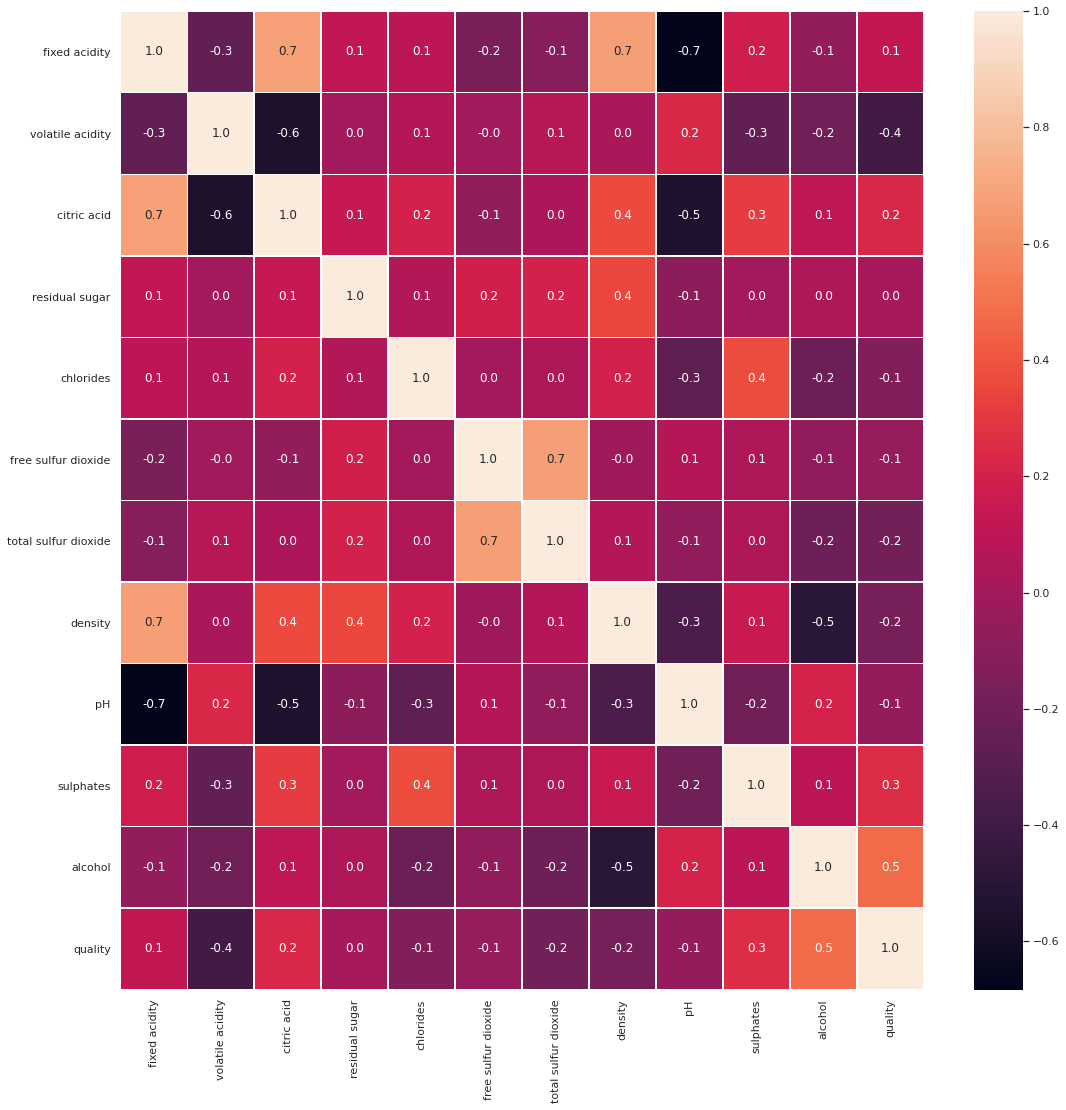

In [14]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5,fmt='.1f',ax=ax)

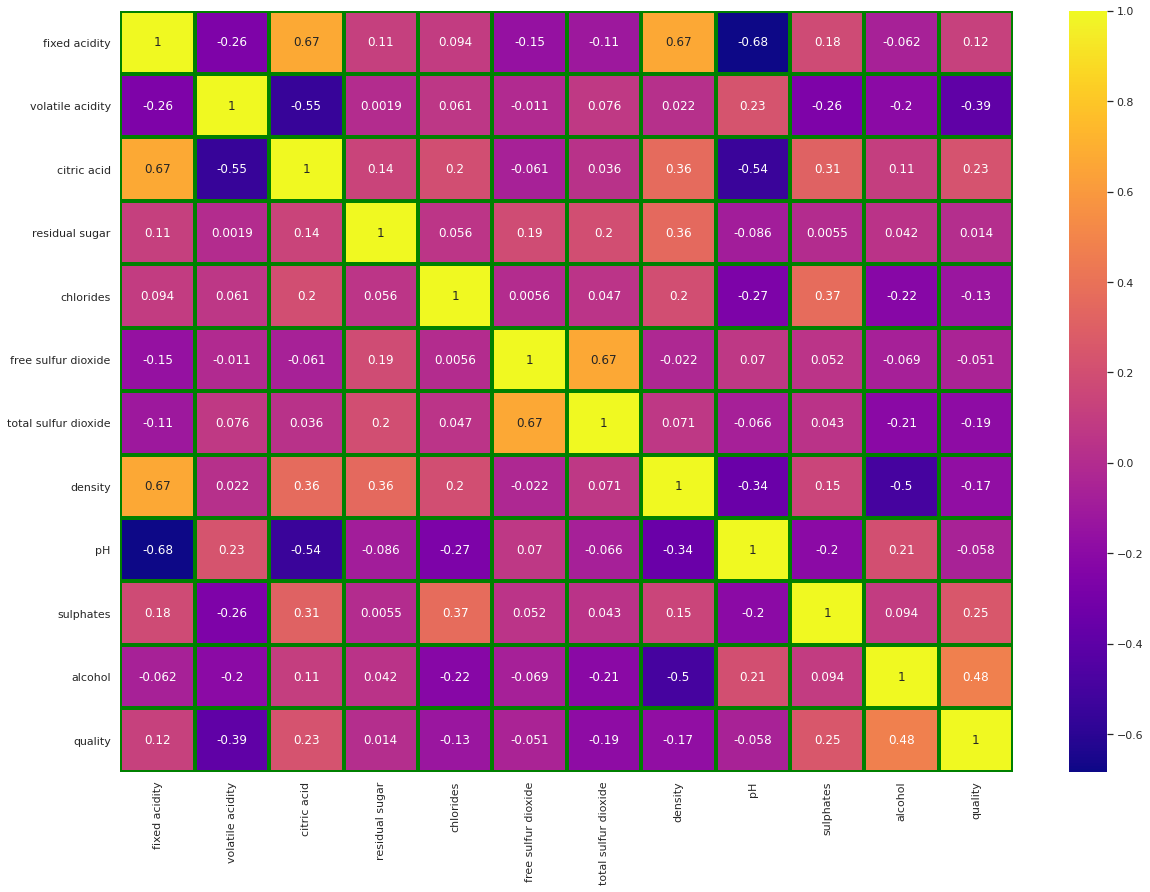

In [15]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')

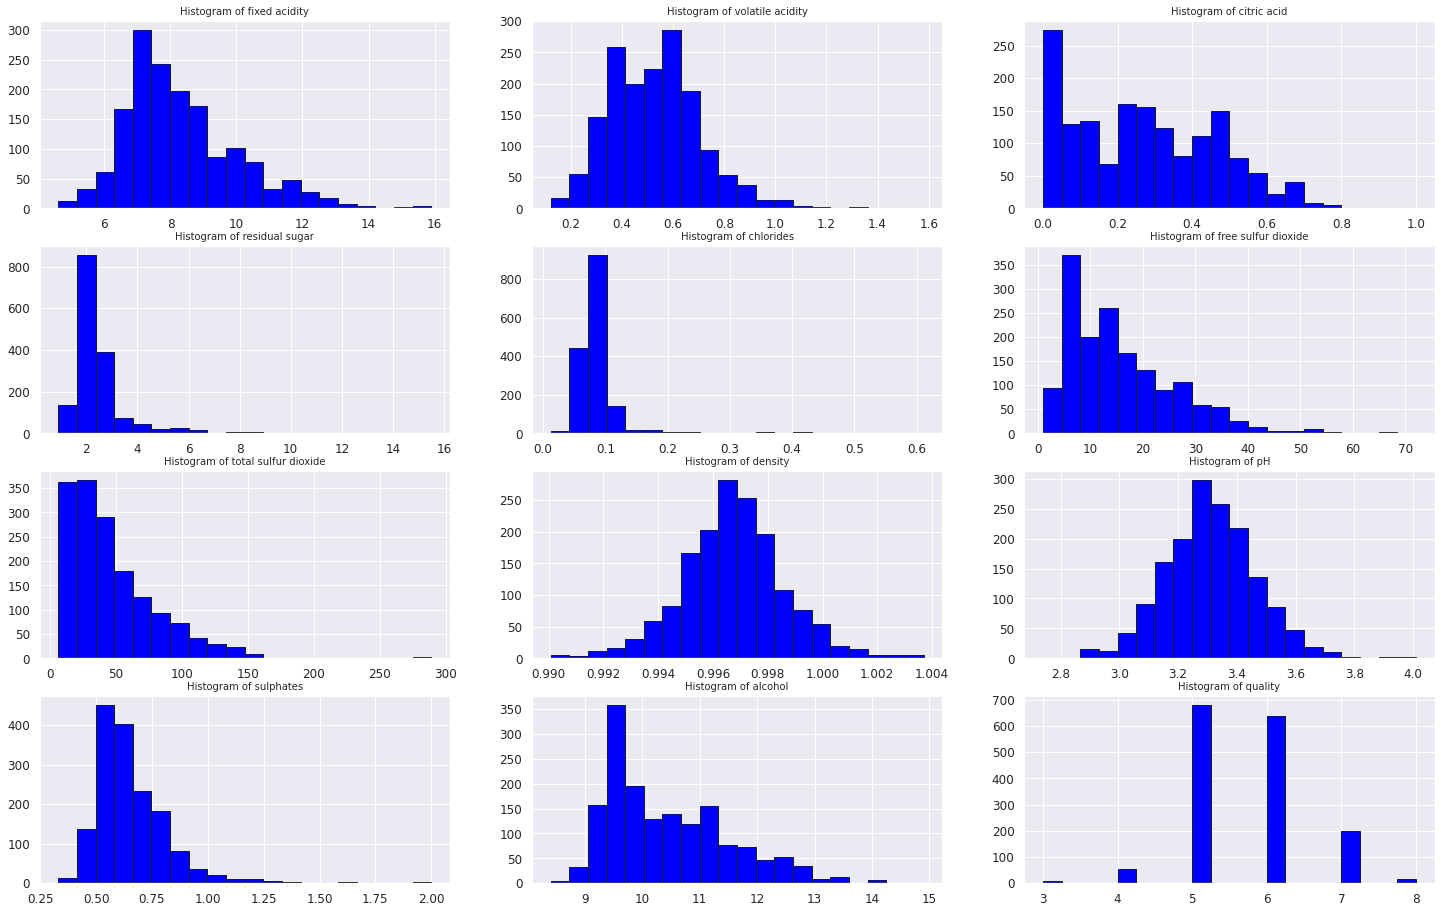

In [16]:
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='blue',edgecolor='k')
    i+=1
plt.show()

In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

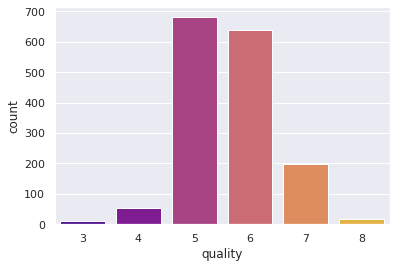

In [18]:
#checking the target variable countplot
sns.countplot(data=df,x = 'quality',palette='plasma')

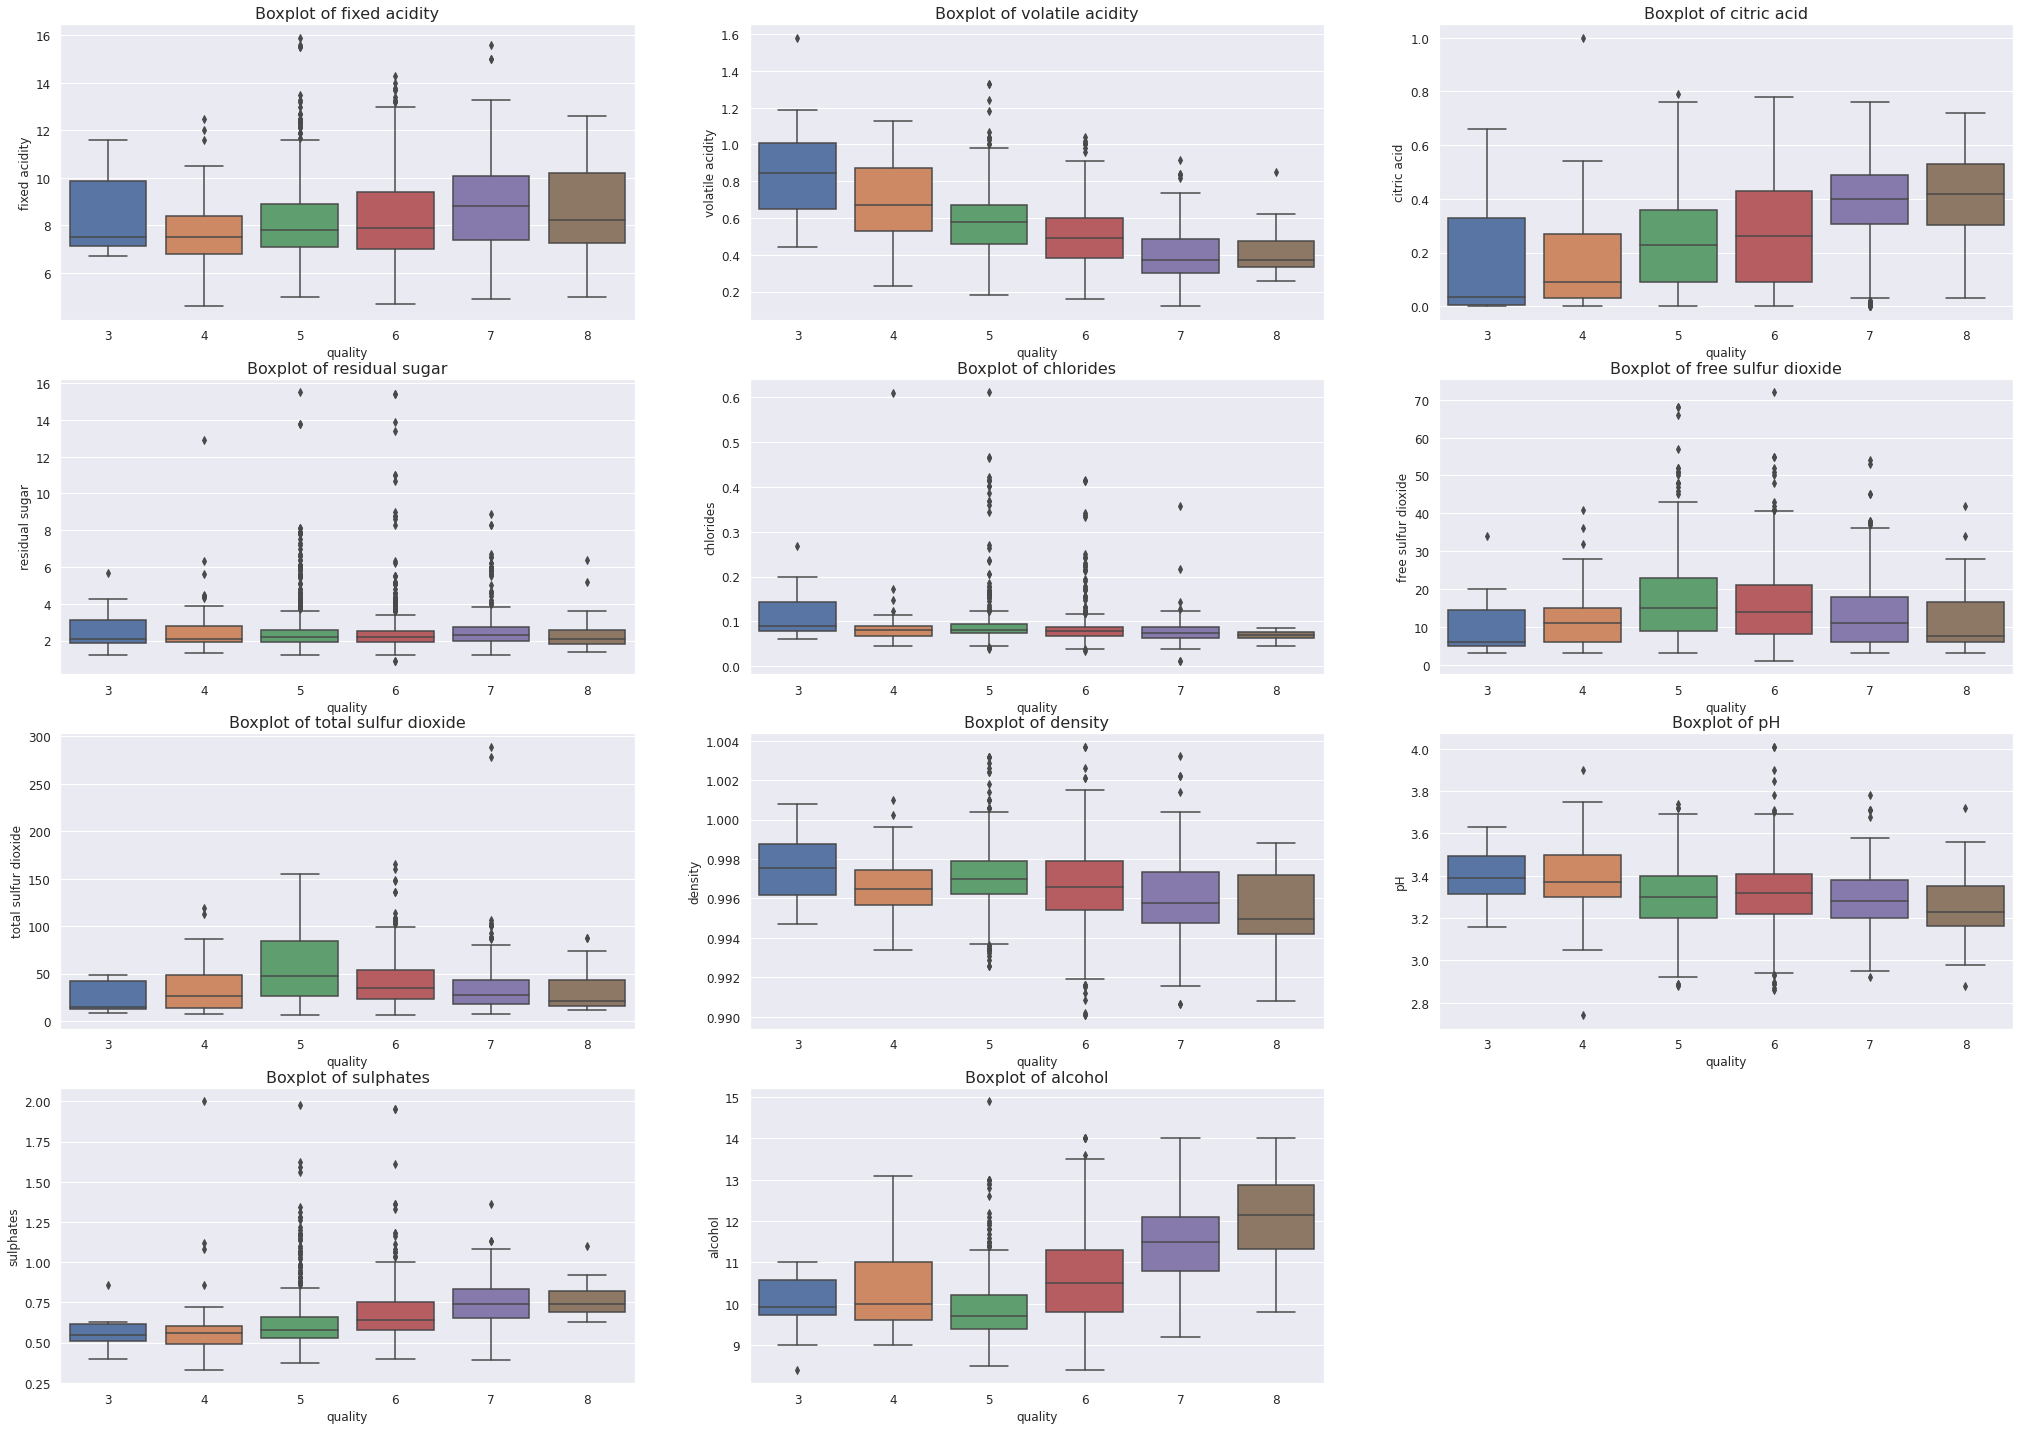

In [19]:

i=1
plt.figure(figsize=(35,25))
for c in df.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['quality'])
    i+=1
plt.show()

In [20]:
#Numerical Columns data distribution

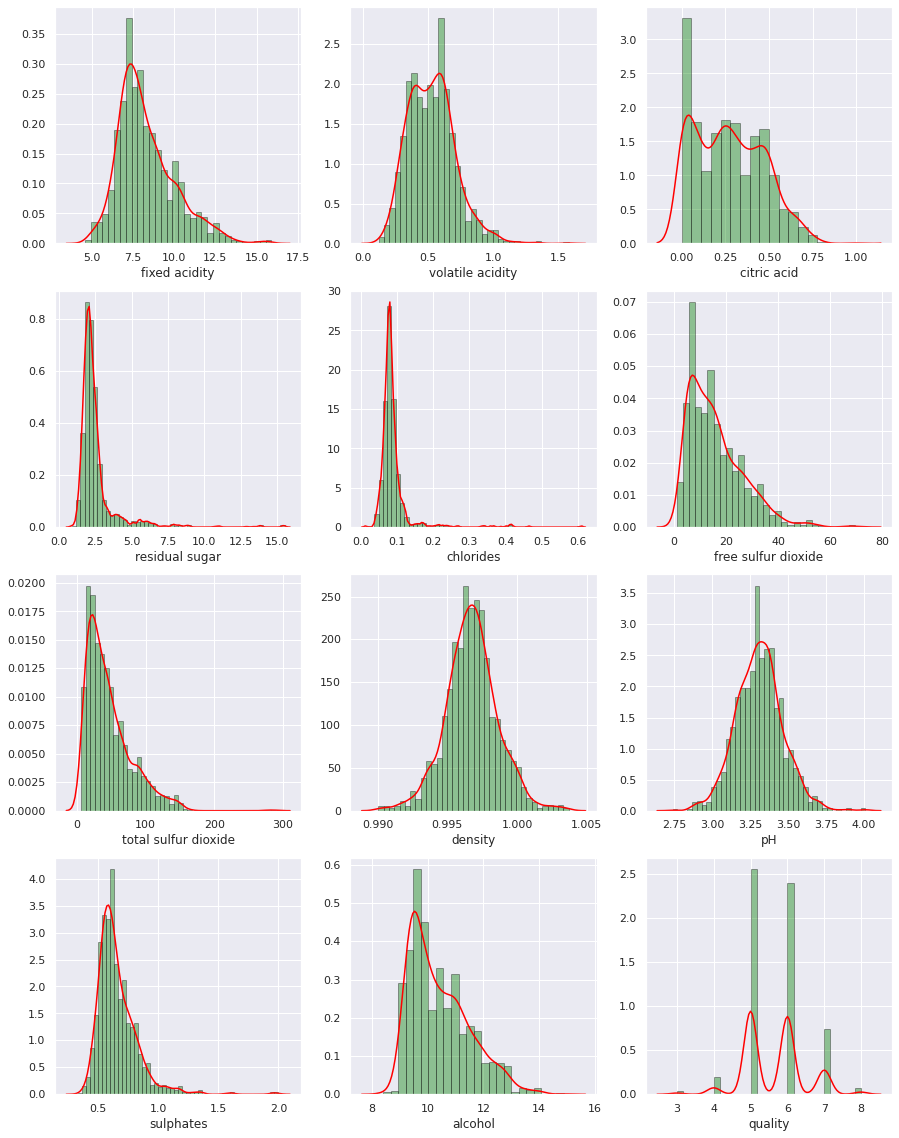

In [21]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='green'),color='red')
    cnt+=1
plt.show() 

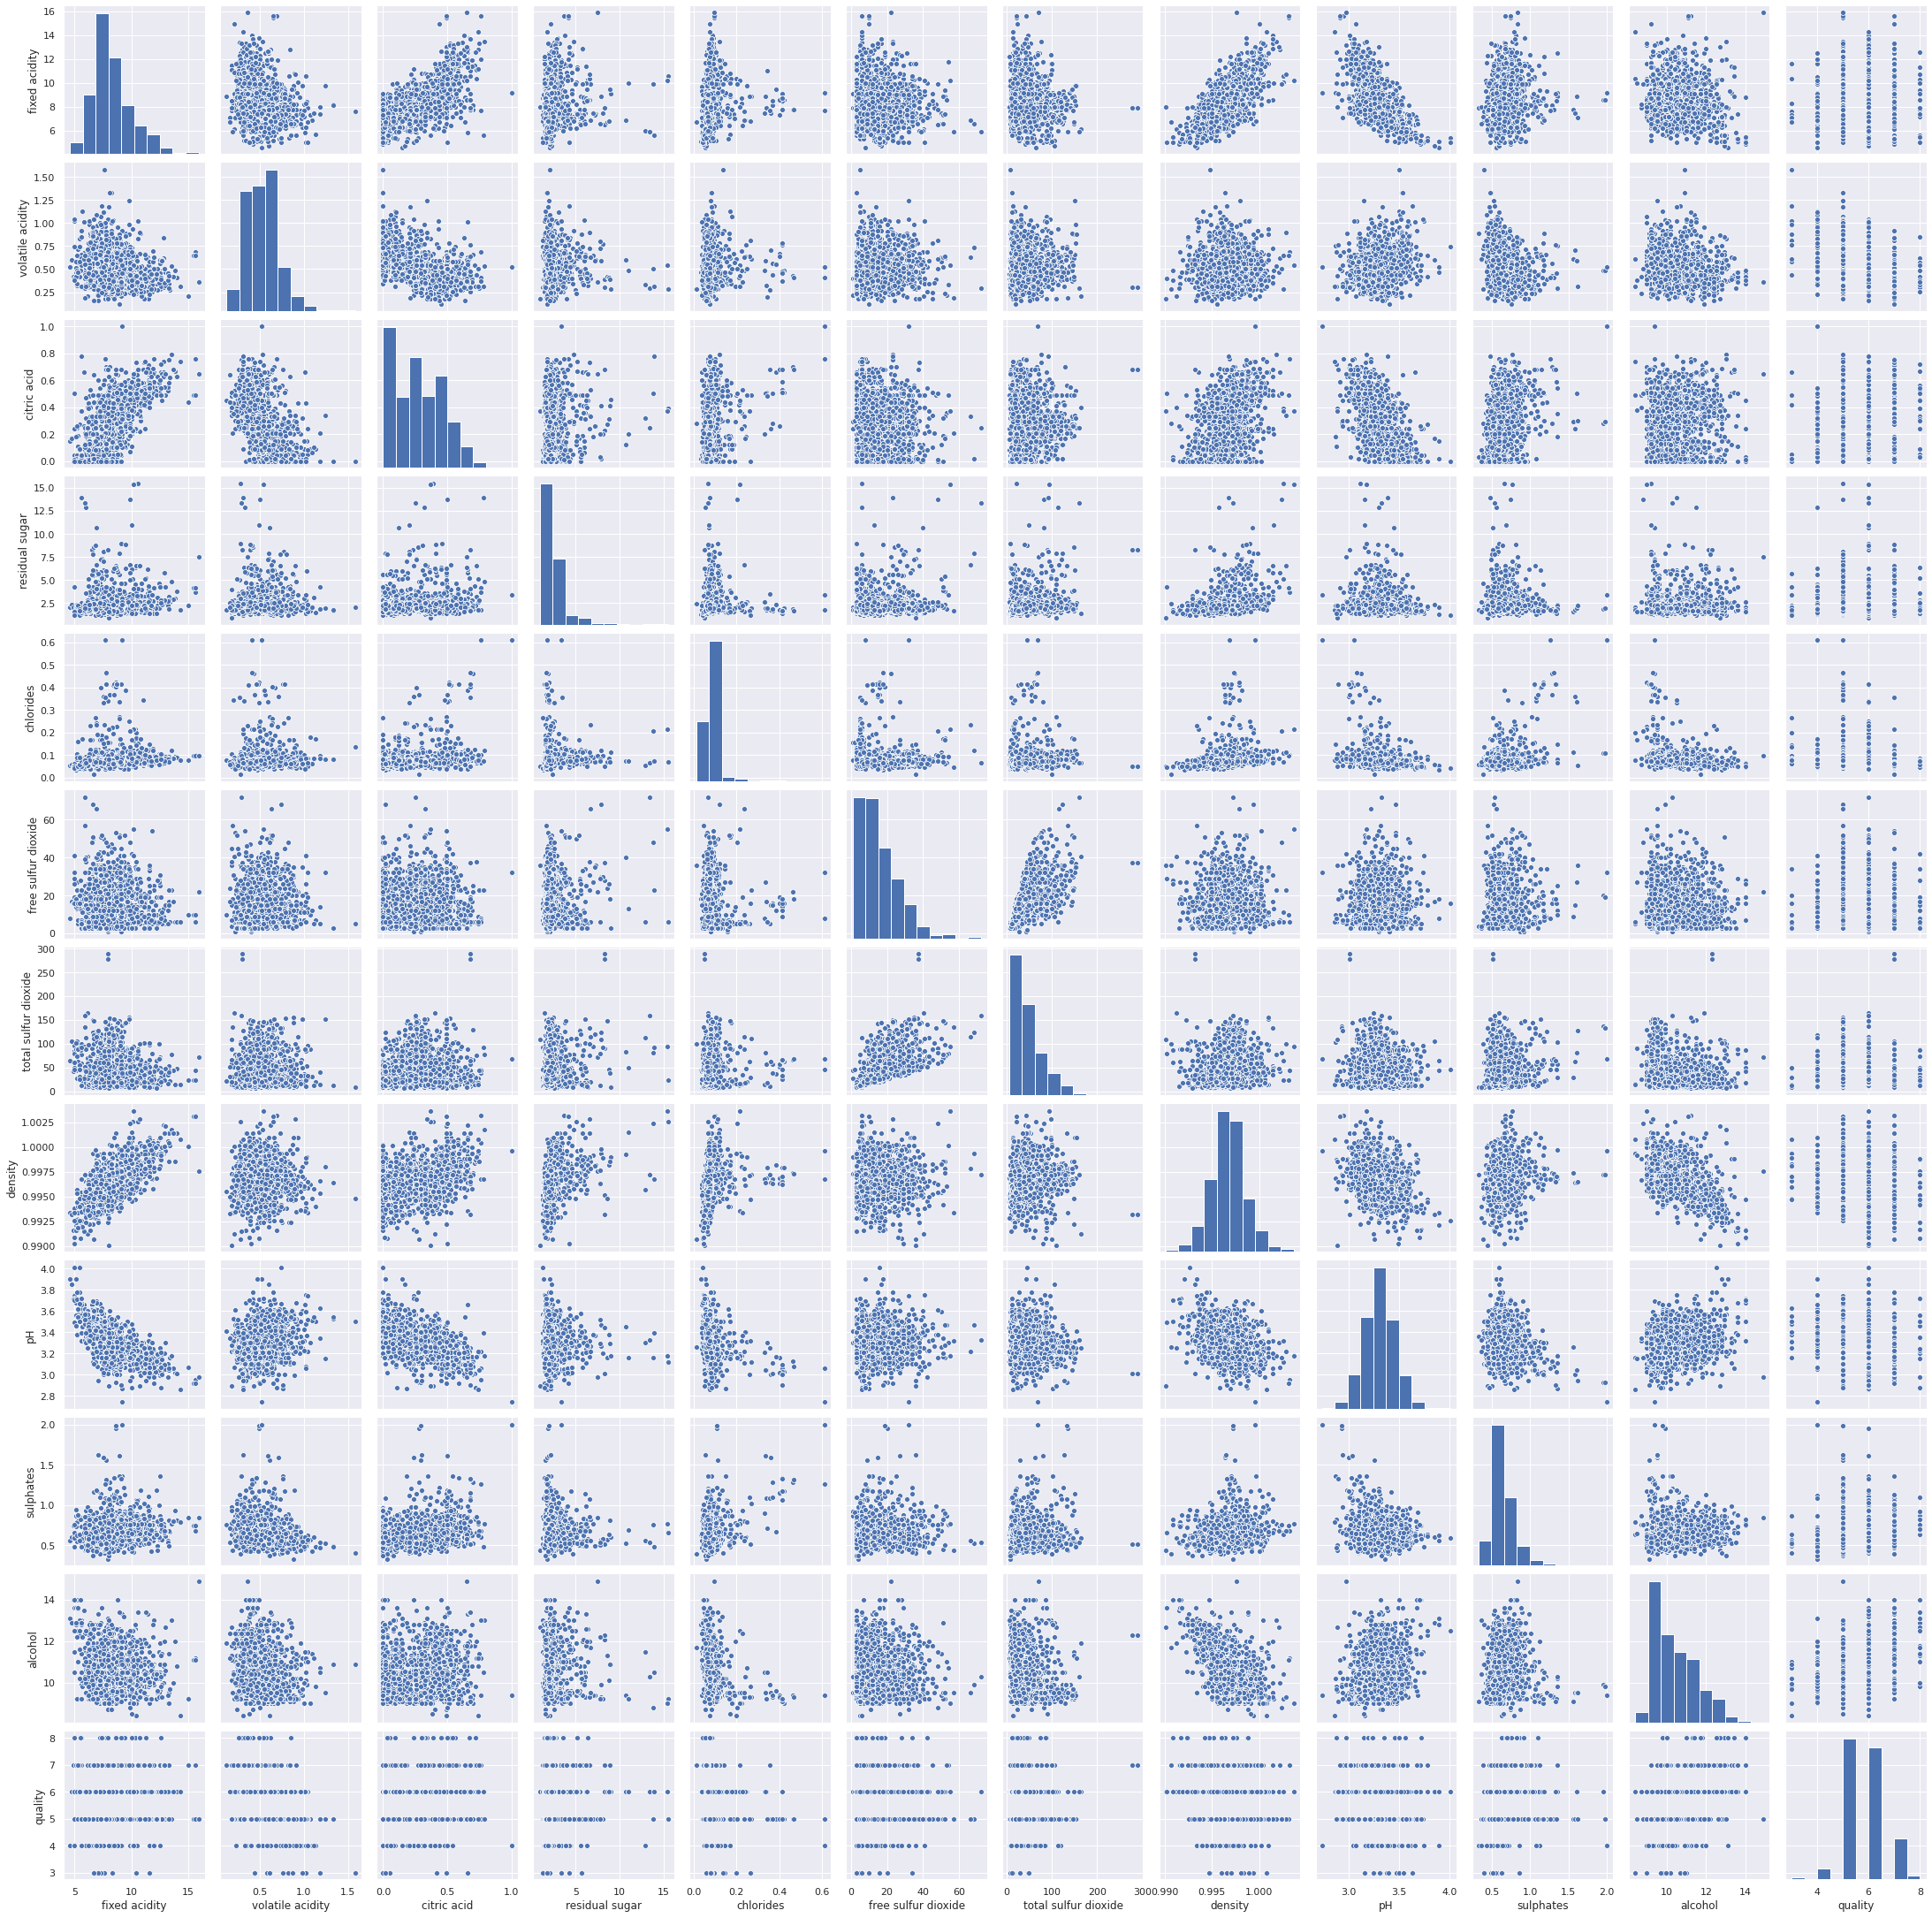

In [22]:
sns.pairplot(df)
plt.show()

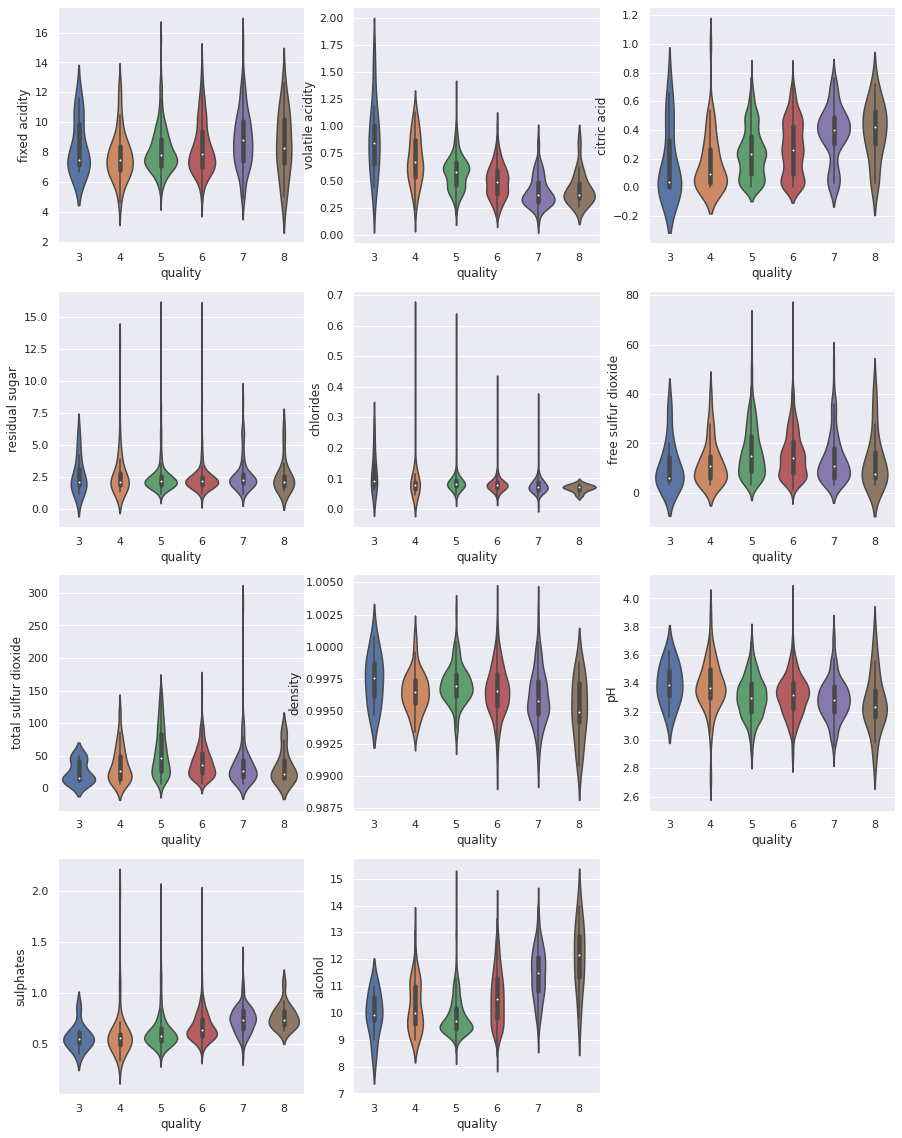

In [23]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="quality", y=col, data=df)
    cnt+=1
plt.show()

In [24]:
# Assuming a wine with quality > 6.5 is 'good' [1] & others are 'ordinary' [0]
df['quality'] = df.quality.apply(lambda x : 1 if x > 6.5 else 0)

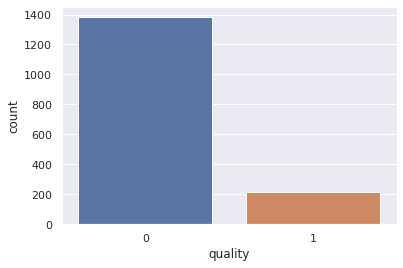

In [25]:
sns.countplot(data = df, x = 'quality')
plt.show()

In [26]:
y= df['quality']

X = df.drop(['quality'],axis = 1)

In [27]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [29]:
import seaborn as sns

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
ec = ExtraTreesClassifier(n_estimators=1000, random_state=0)
ec.fit(X,y)

ExtraTreesClassifier(n_estimators=1000, random_state=0)

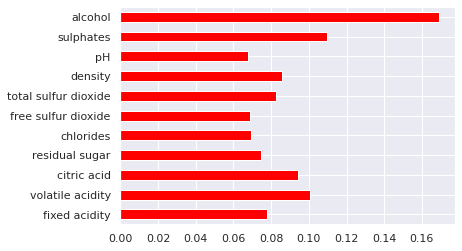

In [32]:
ec_series = pd.Series(ec.feature_importances_,index=X.columns)
ec_series.plot(kind = 'barh',color = 'red')

In [33]:
#Data Pre-Processing & machine Learning Models Performance

In [34]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [35]:
dims = X_train.shape[1]
print(dims, 'dims')

11 dims


In [36]:
print(y_train)

493     0
354     0
342     0
834     0
705     0
       ..
1130    0
1294    0
860     0
1459    1
1126    0
Name: quality, Length: 1279, dtype: int64


In [37]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#For Support vector Algorithm
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [40]:
predictions = model.predict(X_test)

In [41]:

from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,predictions))

[[268   5]
 [ 35  12]]


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [44]:

#Parameter tuning
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [45]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [46]:

grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [47]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [48]:
grid_predictions = grid.predict(X_test)

In [49]:
print(confusion_matrix(y_test,grid_predictions))

[[271   2]
 [ 33  14]]


In [50]:

print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.88      0.30      0.44        47

    accuracy                           0.89       320
   macro avg       0.88      0.65      0.69       320
weighted avg       0.89      0.89      0.87       320



In [51]:
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.3s finished


GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [50, 75, 100, 125, 150],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=1)

In [52]:
grid.best_estimator_

SVC(C=125, gamma=0.01, tol=1e-05)

In [53]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[262  11]
 [ 34  13]]


In [54]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.54      0.28      0.37        47

    accuracy                           0.86       320
   macro avg       0.71      0.62      0.64       320
weighted avg       0.83      0.86      0.84       320



In [55]:
#Using DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=9)

In [56]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [57]:
predictions = dtree.predict(X_test)

In [58]:

from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.66      0.62      0.64        47

    accuracy                           0.90       320
   macro avg       0.80      0.78      0.79       320
weighted avg       0.89      0.90      0.90       320



In [60]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[258  15]
 [ 18  29]]
Accuracy of prediction: 0.897


In [61]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:

rfc_pred = rfc.predict(X_test)

In [64]:
cr = classification_report(y_test,predictions)

In [65]:

print(cr)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.66      0.62      0.64        47

    accuracy                           0.90       320
   macro avg       0.80      0.78      0.79       320
weighted avg       0.89      0.90      0.90       320



In [66]:
#Using XGBboost Classifier

In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [70]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.88%


In [71]:
#Models performance Analysis with scaling(standard Scaler)

In [72]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_models=[]
list_scores=[]
x_train=sc.fit_transform(X_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
pred_1=lr.predict(sc.transform(X_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')

In [73]:

score_1

0.865625

In [74]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(X_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

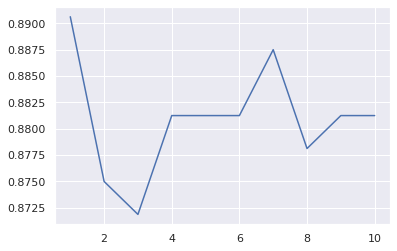

In [75]:
sns.lineplot(x=list(range(1,11)),y=list_1)

In [76]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')

In [77]:
print(max(list_1))

0.890625


In [78]:

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

In [79]:
score_2

0.903125

In [80]:

from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(X_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [81]:
score_3

0.875

In [82]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(X_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [83]:
score_4

0.91875

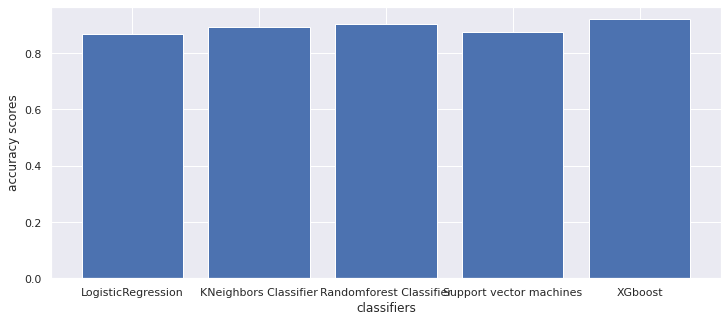

In [84]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

np.random.seed(5)

In [86]:
"""What is clustering?¶
Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.

Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.

What questions does clustering typically tend to answer?

Types of pages are there on the Web?
Types of customers are there in my market?
Types of people are there on a Social network?
Types of E-mails in my Inbox?
Types of Genes the human genome has?
From clustering to classification
Clustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in the social media, and it will be reasonably finite.
Even though each user can vary in fine-grain, they can be reasonably grouped into clusters.
Each of these grouped clusters become classes when we know what group each of these users fall into.

"""

'What is clustering?¶\nClustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.\n\nUseful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.\n\nWhat questions does clustering typically tend to answer?\n\nTypes of pages are there on the Web?\nTypes of customers are there in my market?\nTypes of people are there on a Social network?\nTypes of E-mails in my Inbox?\nTypes of Genes the human genome has?\nFrom clustering to classification\nClustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in

In [87]:
#Partition clustering

In [88]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.396256
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.396256
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.396256
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,-0.396256
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.396256


In [89]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=6)
km.fit(df)

KMeans(init='random', n_clusters=6)

In [90]:
km.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [91]:
km.cluster_centers_

array([[-0.08615071,  0.05730391,  0.09640736,  0.51344527,  0.01352977,
         1.11500246,  1.39218965,  0.37717541, -0.13943047, -0.18271241,
        -0.58027931, -0.36888215],
       [ 0.06532185,  0.0103135 ,  1.10416018, -0.4082848 ,  5.52313653,
        -0.08685714,  0.50070009,  0.18055137, -1.67454694,  3.62449166,
        -0.88828122, -0.29892676],
       [-0.90431227, -0.10864299, -0.4877449 , -0.29414895, -0.40968813,
         0.28803824, -0.10267656, -1.27931667,  0.88831609, -0.00991767,
         1.1732472 , -0.0718252 ],
       [ 0.48117246, -0.86378387,  0.75057557,  0.12895891, -0.22937561,
        -0.26728052, -0.53743308, -0.22820529, -0.32377172,  0.55485621,
         0.9538412 ,  2.52362113],
       [-0.45353704,  0.68157846, -0.77805319, -0.22779417, -0.06630401,
        -0.42162042, -0.36823025, -0.03192044,  0.3502777 , -0.42149522,
        -0.5083129 , -0.37362129],
       [ 1.31802352, -0.62680042,  1.07536365,  0.05570449,  0.0247431 ,
        -0.53088392, -

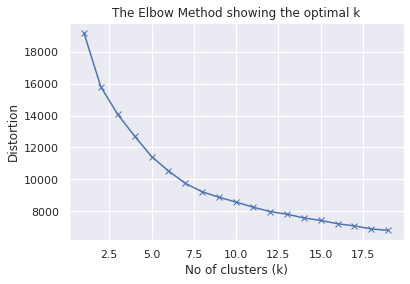

In [92]:
# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

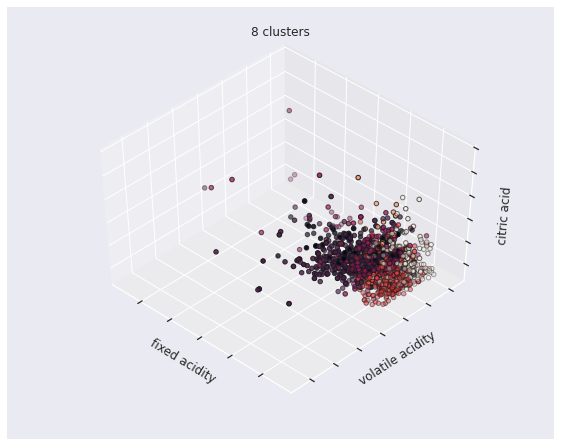

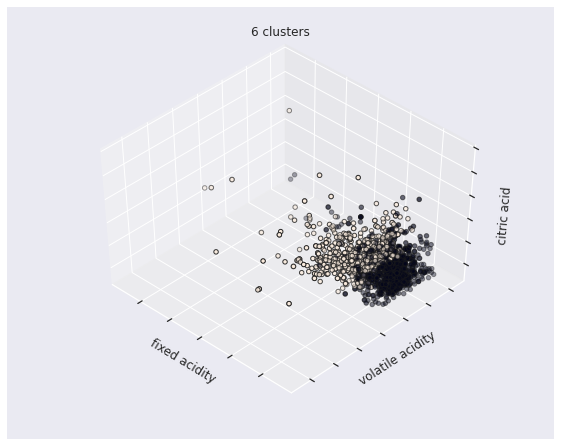

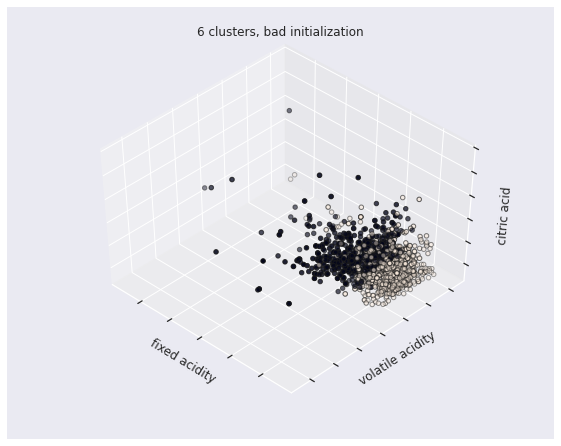

In [93]:
estimators = [('k_means_8', KMeans(n_clusters=6, init='k-means++')),
              ('k_means_6', KMeans(n_clusters=2, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=2, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '6 clusters', '6 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(df)
    labels = est.labels_

    ax.scatter(df.values[:, 3], df.values[:, 0], df.values[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('fixed acidity')
    ax.set_ylabel('volatile acidity')
    ax.set_zlabel('citric acid')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [94]:
#Hierarchical Clustering or Agglomerative clustering.

In [95]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering

AgglomerativeClustering()

In [96]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

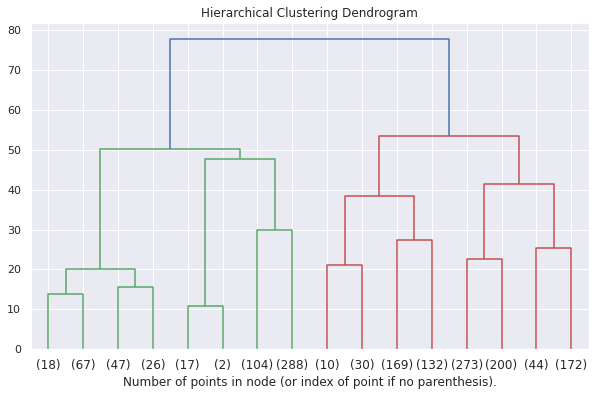

In [97]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

plt.figure(fignum, figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()